**Lab 3** for the course of *Selected Topics in Music and Acoustic Engineering* :

***Machine Learning for Audio and Acoustic Engineering***
---

# Students:
- Carmen Frieda Franci
- Nicola Antonio Magno
  

# **Lab 3: Neural Networks**

In this lab we will start to work with deep learning models. We will begin by looking at simple examples with synthetically generated data. Then, you will move to a more challenging and realistic problem.


### **Exercise 1**: Approximating Synthetic Data

Execute the following lines for create a synthetically generated dataset:

In [284]:
#!conda install tensorflow -y

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import librosa
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.style.use("seaborn-v0_8")



In [285]:
def gen_data(size, a, b):
  x = np.random.rand(size,1)-0.5
  y = a*x + b
  y = y*(x>0)
  y = y + 0.2*(np.random.randn(*x.shape))
  return x, y

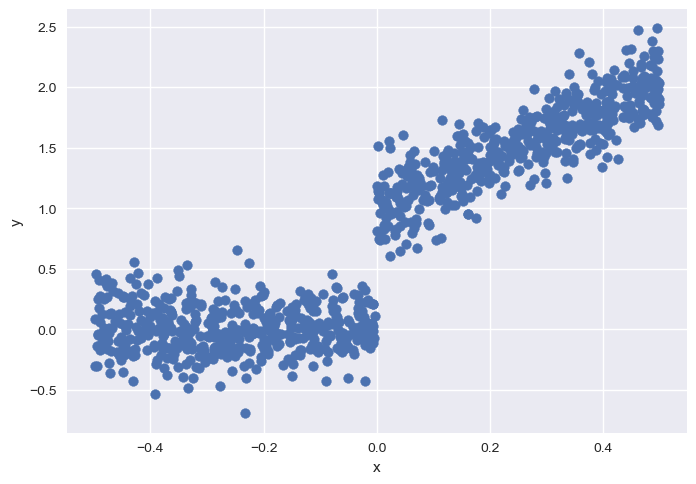

In [286]:
# Create data and plot
Xdata, Ydata = gen_data(1000, 2, 1)
plt.scatter(Xdata,Ydata);
plt.xlabel('x');
plt.ylabel('y');

Describe the function underlying the model used to generate the data. Complete the symbols "?"

\begin{equation}
  y(x)=\begin{cases}
    2x + 1 + 0.2 \cdot  \mathcal{N}(0, 1) & \text{if } x > 0 \text{ , where } x = \mathcal{U}(0, 1) - 0.5 \\
    0.2 \cdot  \mathcal{N}(0, 1), & \text{otherwise}.
  \end{cases}
\end{equation}






The data was generated using a piecewise function depending on the sign of the input variable $x$, which itself is uniformly sampled in the interval $[-0.5, 0.5]$, since:

$$
x = \mathcal{U}(0, 1) - 0.5
$$

The function defining $y(x)$ adds Gaussian noise with standard deviation 0.2, but its mean behavior changes based on whether $x > 0$ or not:

$$
y(x) =
\begin{cases}
2x + 1 + 0.2 \cdot \mathcal{N}(0, 1), & \text{if } x > 0 \\
0.2 \cdot \mathcal{N}(0, 1), & \text{otherwise}
\end{cases}
$$

This creates two distinct regions:
- One where the data is centered around the linear function $2x + 1$, resulting in a clearly visible line with some noise,
- And one where the data is centered around 0 with only noise.

As shown in the scatter plot, the result is two well-separated clouds of points: one noisy linear cluster for $x > 0$, and one noisy horizontal cluster around zero for $x \leq 0$.



### **Exercise 2**: Create a MLP neural network model using Keras

Create the following fully-connected feedforward network using Keras' sequential model. Use:

| Layer | Type  | Units | Activation | Description                                                  |
|-------|-------|-------|------------|--------------------------------------------------------------|
| 1     | Dense | 5     | ReLU       | First hidden layer with 5 neurons, applies non-linearity     |
| 2     | Dense | 5     | ReLU       | Second hidden layer, also with 5 neurons                     |
| 3     | Dense | 1     | Linear     | Output layer, returns a single continuous value (regression) |

Show the model's summary.

![](https://drive.google.com/uc?export=view&id=1UJwycQXQG8kkF0N8CmDW-ED-hY-Uck5o)



In [287]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential([
    # First hidden layer with 5 neurons and ReLU activation
    Dense(5, activation='relu', input_shape=(1,)),
    
    # Second hidden layer with 5 neurons and ReLU activation
    Dense(5, activation='relu'),
    
    # Output layer with 1 neuron and linear activation (for regression)
    Dense(1, activation='linear')
])

# Show the model's summary
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 5)                 10        
                                                                 
 dense_29 (Dense)            (None, 5)                 30        
                                                                 
 dense_30 (Dense)            (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


How many parameters has the model?  (Hint: use the function model.summary())

In [288]:

# Print total number of parameters
model.count_params()

46

It has 46 parameters.

Compile the model and train it on Xdata using MSE as the loss function and SGD optimizer with learning rate 0.01. Train the model until reaching 300 epochs.

In [289]:

from tensorflow.keras.optimizers import SGD

# Compile the model using Mean Squared Error loss and SGD optimizer
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='mse'
)

# Train the model on Xdata and Ydata for 300 epochs
history = model.fit(Xdata, Ydata, epochs=300)


Epoch 1/300
32/32 [==============================] - 0s 2ms/step - loss: 0.4455
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1595
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 0.1021
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0842
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0773
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0741
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0721
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0709
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0700
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0692
Epoch 11/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0687
Epoch 12/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0683
Epoch 13/300
32/32 [=================

Plot the training history of the network, showing the evolution of the training loss.

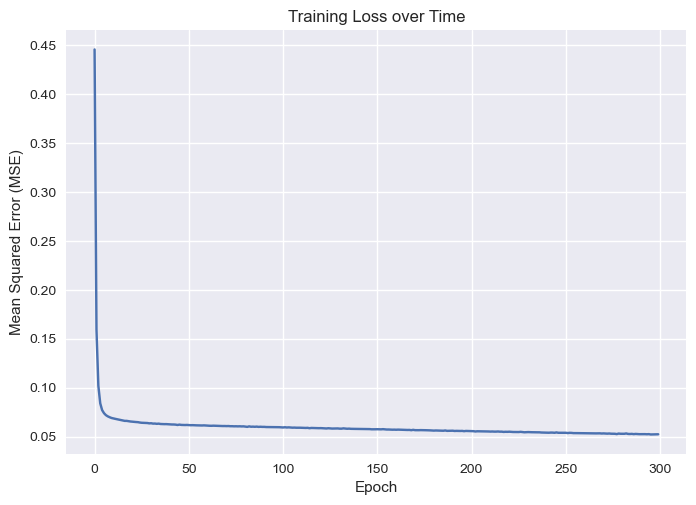

In [290]:
# Plot the training loss over epochs
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Loss over Time')
plt.grid(True)
plt.show()

Which is the minimum loss achieved by the model? At which epoch achieved that loss value?

In [291]:

# Find the minimum loss and its corresponding epoch
min_loss = min(history.history['loss'])
min_loss_index = [i for i, l in enumerate(history.history['loss']) if l == min_loss]

# Print the result 

print('Minumum Loss on the Training Set: ', min_loss , ' obtained at epoch: ', ''.join(map(str, [min_loss_index[0]])) )

Minumum Loss on the Training Set:  0.05240188539028168  obtained at epoch:  295


Plot the true training data together with the approximated data using the predictions.

32/32 [==============================] - 0s 2ms/step


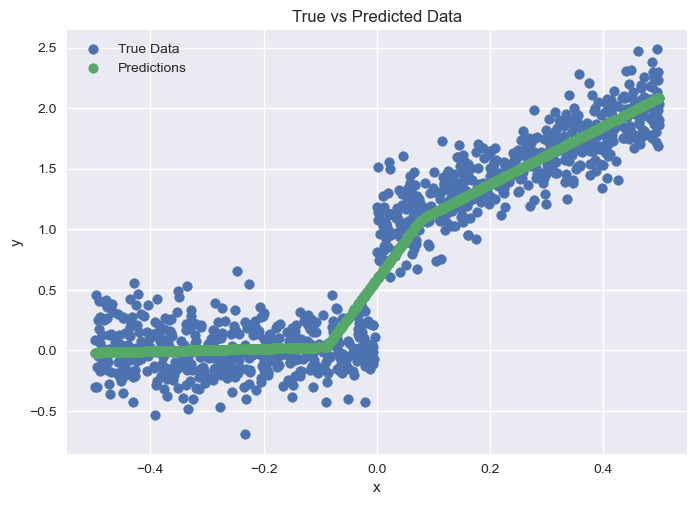

In [292]:

# Make predictions using the trained model
preds = model.predict(Xdata)

# Plot true training data
plt.scatter(Xdata, Ydata, label='True Data')

# Plot predicted data
plt.scatter(Xdata, preds, label='Predictions')

# Add legend and labels
plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs Predicted Data')
plt.legend()
plt.grid(True)
plt.show()

Now initialize the model again and fit it, but train it for 1000 epochs.

In [293]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Define the Fully-connected MLP
model_1000 = Sequential([
    Dense(5, activation='relu', input_shape=(1,)),
    Dense(5, activation='relu'),
    Dense(1, activation='linear')
])

# Compiling the model
opt = SGD(learning_rate=0.01)
model_1000.compile(optimizer=opt, loss='mse')

# Training the model
history_1000 = model_1000.fit(Xdata, Ydata, epochs=1000)


Epoch 1/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.6577
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.3017
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.2020
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1485
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1164
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0974
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0870
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0807
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0769
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0742
Epoch 11/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.0725
Epoch 12/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.0712
Epoch 13/1000
32/32 [====

Plot the original data and the predicted data. What are the differences observed with respect to the case before?

32/32 [==============================] - 0s 4ms/step


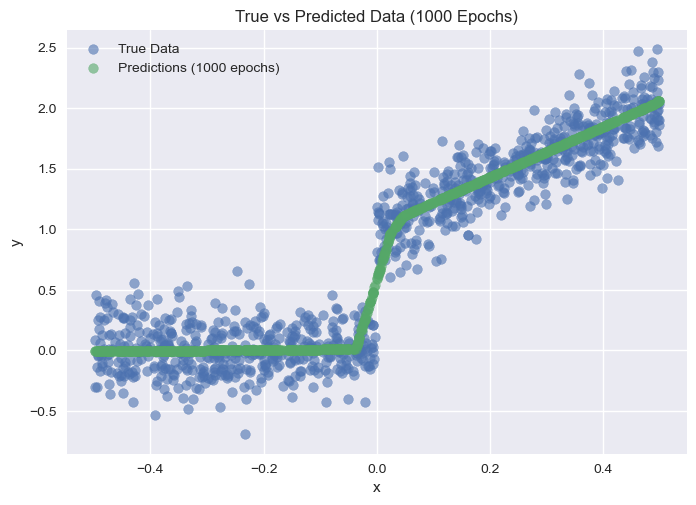

32/32 [==============================] - 0s 2ms/step


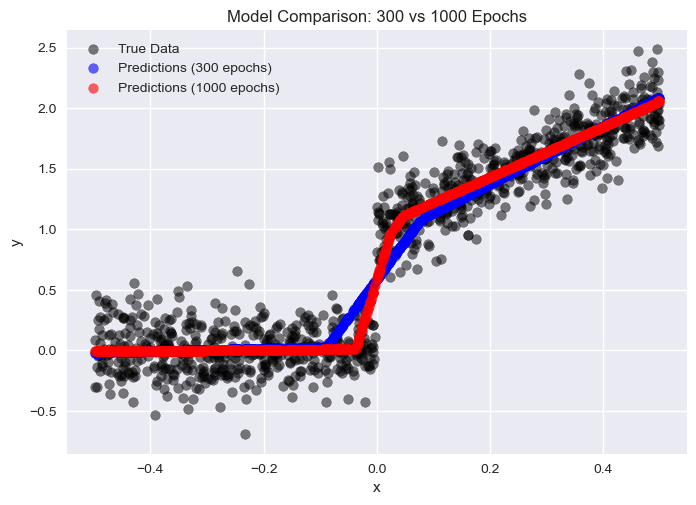

In [294]:
# Predict using the model trained for 1000 epochs
preds_1000 = model_1000.predict(Xdata)

# Plot original data
plt.scatter(Xdata, Ydata, label='True Data', alpha=0.6)

# Plot predicted data
plt.scatter(Xdata, preds_1000, label='Predictions (1000 epochs)', alpha=0.6)

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('True vs Predicted Data (1000 Epochs)')
plt.legend()
plt.grid(True)
plt.show()


# Predict using both models
preds_300 = model.predict(Xdata)        # model trained for 300 epochs
preds_1000 = model_1000.predict(Xdata)  # model trained for 1000 epochs

# Plot the true data
plt.scatter(Xdata, Ydata, label='True Data', alpha=0.5, color='black')

# Plot predictions from 300 epochs model
plt.scatter(Xdata, preds_300, label='Predictions (300 epochs)', alpha=0.6, color='blue')

# Plot predictions from 1000 epochs model
plt.scatter(Xdata, preds_1000, label='Predictions (1000 epochs)', alpha=0.6, color='red')

# Labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Comparison: 300 vs 1000 Epochs')
plt.legend()
plt.grid(True)
plt.show()


The model trained for **1000 epochs** predicts the data very well, following both the flat region for \( x < 0 \) and the linear region for \( x > 0 \).

When comparing **300 vs 1000 epochs**:
- The **300-epoch** model captures the overall shape but is less precise near \( x = 0 \).
- The **1000-epoch** model provides a smoother and more accurate prediction.

Training for more epochs improves the fit, especially around the transition point.

What is the best loss achieved in this case?

In [295]:
# Find the best loss and its epoch for the 1000-epoch model
min_loss_1000 = min(history_1000.history['loss'])
min_loss_index_1000 = [i for i, l in enumerate(history_1000.history['loss']) if l == min_loss_1000]

# Print the result
print('Minimum Loss on the Training Set (1000 epochs):', min_loss_1000, 'obtained at epoch:', min_loss_index_1000[0])

Minimum Loss on the Training Set (1000 epochs): 0.04189010709524155 obtained at epoch: 984


The minimum training loss for the model trained for 1000 epochs is approximately **0.04**.

Indeed, after a certain number of epochs, the model reaches a local minimum and further training does not lead to significant improvements in the loss function. This suggests that both the 300 and 1000-epoch models may converge to similar solutions, and training beyond that point yields diminishing returns.


### **Exercise 3**: Classification

Generate synthetically two bivariate Gaussian vectors (see np.random.multivariate_normal), each one with 1000 samples:

*   Xdata0, with mean [-1,-1] and covariance [[4,0],[0,4]]
*   Xdata1, with mean [1,1] and covariance [[3,0],[0,3]]





In [296]:
# Bivariate Gaussian
mean0 = [-1, -1]
cov0 = [[4, 0], [0, 4]]   # diagonal covariance matrix

mean1 = [1, 1]
cov1 = [[3, 0], [0, 3]]

# Generate 1000 samples from each distribution
Xdata0 = np.random.multivariate_normal(mean0, cov0, 1000)
Xdata1 = np.random.multivariate_normal(mean1, cov1, 1000)

# Print shape to verify
print(Xdata0.shape, Xdata1.shape)

(1000, 2) (1000, 2)


Expected output:
```
(1000, 2) (1000, 2)
```

From the above Gaussian vectors, stack them to generate a feature data matrix Xdatac with shape (2000,2) and the corresponding label vector Ydatac with zeros and ones of shape (2000,)

In [297]:
#Features
# Features
Xdatac = np.vstack((Xdata0, Xdata1))  # Stack vertically: shape (2000, 2)

# Labels
labels0 = np.zeros(Xdata0.shape[0])   # Class 0 (1000 samples)
labels1 = np.ones(Xdata1.shape[0])    # Class 1 (1000 samples)
labels_gt = np.concatenate((labels0, labels1), axis=0)  # Shape (2000,)

# Check dimensions
print(Xdatac.shape, labels_gt.shape)

(2000, 2) (2000,)


Expected output:
```
(2000, 2) (2000, 2)
```

Create a scatterplot of the two classes:

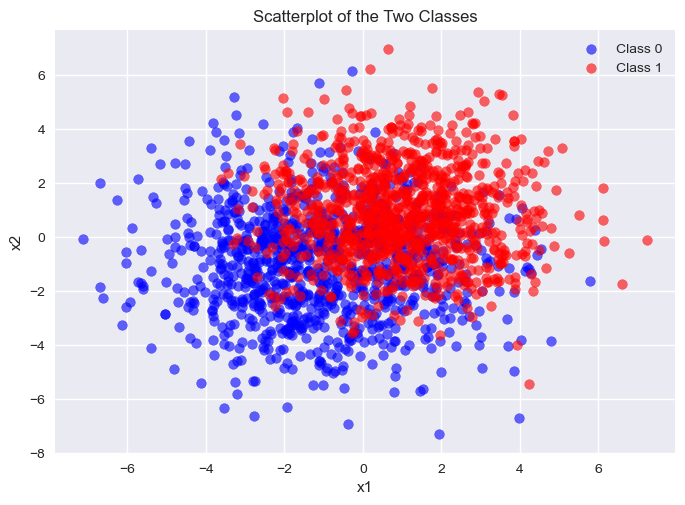

In [298]:
# Class 0
plt.scatter(Xdatac[labels_gt == 0, 0], Xdatac[labels_gt == 0, 1], 
            label='Class 0', alpha=0.6, c='blue')

# Class 1
plt.scatter(Xdatac[labels_gt == 1, 0], Xdatac[labels_gt == 1, 1], 
            label='Class 1', alpha=0.6, c='red')

# Aesthetics
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatterplot of the Two Classes')
plt.legend()
plt.grid(True)
plt.show()

Divide the data Xdatac into a training partition and validation partition using "train_test_split" from sklearn. Use 30% of your data for validation.

In [299]:
from sklearn.model_selection import train_test_split

# Split: 70% training, 30% validation
X_train, X_valid, y_train, y_valid = train_test_split(
    Xdatac, labels_gt, test_size=0.3, random_state=42
)

#  verify shapes
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(1400, 2) (600, 2) (1400,) (600,)


Create a model identical to the one of Exercise 2 but use sigmoid activation in the output layer. You need also now to specify that the input has two values.

Train the model on the training partion. Select as loss function "binary_crossentropy" and monitor the training accuracy using metrics=["accuracy"]. Use also the validation partition to track the validation accuracy at each epoch.

In [300]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Define the Fully-connected MLP for classification
model = Sequential([
    Dense(5, activation='relu', input_shape=(2,)),   # input shape is now (2,)
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')                   # sigmoid for binary classification
])

# Compile the model
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=300
)

Epoch 1/300
44/44 [==============================] - 1s 11ms/step - loss: 0.6100 - accuracy: 0.6457 - val_loss: 0.5990 - val_accuracy: 0.7417
Epoch 2/300
44/44 [==============================] - 0s 4ms/step - loss: 0.5949 - accuracy: 0.7357 - val_loss: 0.5909 - val_accuracy: 0.7450
Epoch 3/300
44/44 [==============================] - 0s 4ms/step - loss: 0.5869 - accuracy: 0.7486 - val_loss: 0.5844 - val_accuracy: 0.7633
Epoch 4/300
44/44 [==============================] - 0s 4ms/step - loss: 0.5803 - accuracy: 0.7493 - val_loss: 0.5788 - val_accuracy: 0.7683
Epoch 5/300
44/44 [==============================] - 0s 4ms/step - loss: 0.5745 - accuracy: 0.7500 - val_loss: 0.5740 - val_accuracy: 0.7717
Epoch 6/300
44/44 [==============================] - 0s 4ms/step - loss: 0.5695 - accuracy: 0.7529 - val_loss: 0.5698 - val_accuracy: 0.7633
Epoch 7/300
44/44 [==============================] - 0s 4ms/step - loss: 0.5650 - accuracy: 0.7557 - val_loss: 0.5663 - val_accuracy: 0.7600
Epoch 8/300


Plot the training history showing the training accuracy and validation accuracy.

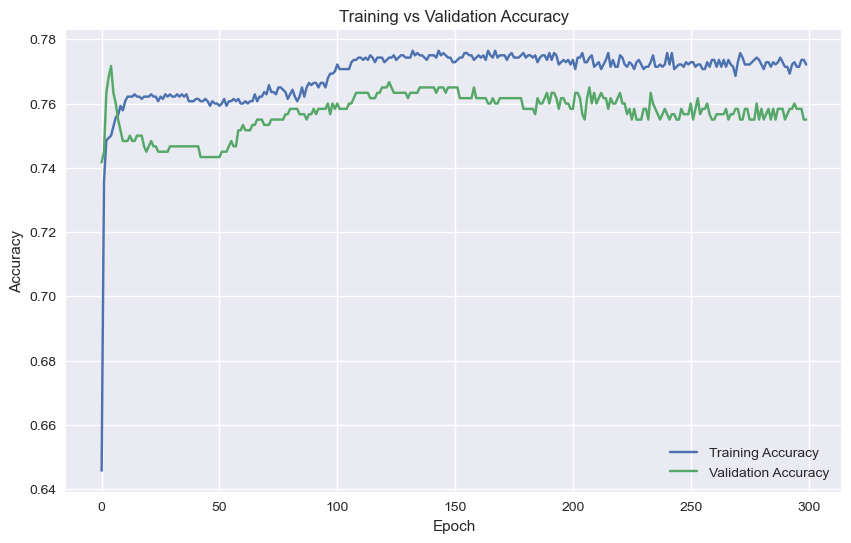

In [301]:
# Plot training  validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Aesthetics
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Predict over the training data and create a scatter plot showing the predicted class for each data example.

44/44 [==============================] - 0s 2ms/step


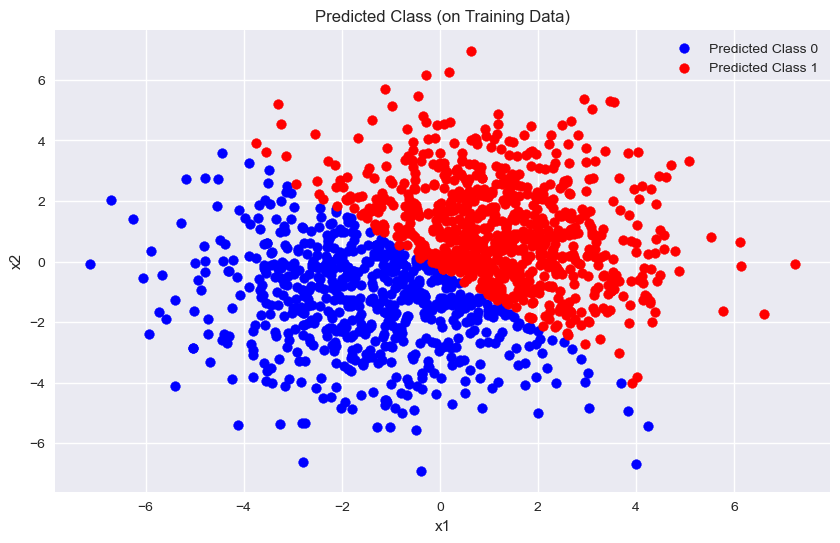

In [302]:
# Predict on training data 
y_pred_probs = model.predict(X_train)

# Convert probabilities to class labels (0 or 1)
y_pred_classes = (y_pred_probs > 0.5).astype(int).flatten()

# Scatter plot of predicted classes
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_pred_classes == 0, 0], X_train[y_pred_classes == 0, 1], c='blue', label='Predicted Class 0')
plt.scatter(X_train[y_pred_classes == 1, 0], X_train[y_pred_classes == 1, 1], c='red', label='Predicted Class 1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Predicted Class (on Training Data)')
plt.legend()
plt.grid(True)
plt.show()

### **Exercise 4**: Data Preparation


Follow the same steps in Lab 2 to download the ESC-50 dataset.

In [303]:
#!wget https://github.com/karolpiczak/ESC-50/archive/master.zip
#!unzip master.zip

Create a list of the files corresponding to the 10 first classes. Those files will form our dataset (400 signals).

In [304]:
fn_csv = 'ESC-50-master/meta/esc50.csv'

files = []  # File list
labels = []  # Class list


# Read CSV
df = pd.read_csv(fn_csv)

# Loop through CSV rows and collect the first 10 classes
for i in range(len(df)):
    if df.loc[i, 'category'] in df['category'].unique()[:10]:
        files.append(df.loc[i, 'filename'])
        labels.append(df.loc[i, 'category'])

# Convert labels to numerical (0 to 9)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

print(f'Lengths: esc5_X: {len(files)}, esc5_y: {len(labels)}')


Lengths: esc5_X: 400, esc5_y: 400


Expected output:

``` Lengths: esc5_X: 400, esc5_y: 400 ```

Convert the labels to class indexes (rank 1) - e.g. 0,1,2,....,9

In [305]:

labels = le.fit_transform(labels)
print(le.classes_) 


[0 1 2 3 4 5 6 7 8 9]


Create a list storing the signals from all the files:

In [306]:
import os

# Create an empty list to store all the audio signals
signals = []

# Iterate over the list of file paths
for f in files:
    # Load the audio file using librosa (default sampling rate is 22050 Hz)
    signal, sr = librosa.load(os.path.join('ESC-50-master/audio/', f), sr=22050)
    
    # Append the signal to the list
    signals.append(signal)

For each signal in the list, compute the melspectrogram with librosa using default parameters:

In [307]:
# Check the length of the first signal
print(f"Length of first signal: {len(signals[0])}")

# List to store mel spectrograms
mel_spegrams = []

# Compute mel spectrograms using default parameters
for signal in signals:
    mel_spec = librosa.feature.melspectrogram(y=signal)  # default: sr=22050, n_mels=128
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    mel_spegrams.append(mel_spec_db)

Length of first signal: 110250


Convert the list to a numpy array called Xdata. You should end up with an array of shape (400, 128, 216). What do these numbers mean?

In [308]:
Xdata = np.asarray(mel_spegrams)
Xdata.shape

(400, 128, 216)

Expected output:

```(400, 128, 216)```

### Q: What do the numbers (400, 128, 216) mean?

- **400**: The number of audio signals processed — i.e., the number of mel spectrograms computed (one per audio sample).
- **128**: The number of Mel frequency bands (default value in `librosa.feature.melspectrogram`, controlled by `n_mels=128`).
- **216**: The number of time frames in each spectrogram, which depends on the length of the audio signal and the hop length used in the STFT (default: 512 samples at 22050 Hz).

So, each signal is transformed into a 2D image of shape (128, 216), and the full dataset is a 3D array with shape (400, 128, 216).


### **Exercise 5**: MLP Classification

Let's try now to classify the audio files by using the computed mel spectrogram data. First, flatten each spectrogram into a one-dimensional array, so that you end up with a new array Xdata_f of shape (400, 27648). You can do that by using the function reshape from numpy.

In [309]:
# Flatten each mel spectrogram (128 × 216) into a single vector (27648)
Xdata_f = Xdata.reshape(Xdata.shape[0], -1)

print(Xdata_f.shape)

(400, 27648)


Expected output:
```
(400, 27648)
```

Let's first use the sklearn StandardScaler function to scale the data (save the output in Xdata_s)

In [310]:
# Create the scaler and fit it to the data
scaler = StandardScaler()
Xdata_s = scaler.fit_transform(Xdata_f)

Create a test and validation split with 20% of the samples. Call the splits X_train, y_train, X_val, y_val.

In [311]:
X_train, X_val, y_train, y_val = train_test_split(Xdata_s, labels, test_size=0.2, random_state=42, stratify=labels)

Now, create a MLP-based network for classifying these audios. You can use the same layer structure as in the previous examples, but remember to adapt the output layer so that its size is equal to the number of classes and apply 'softmax' activation. You can also try to increase the number of neurons in the hidden layers.

Proposed architecture:

| Layer | Type  | Units | Activation | Output Shape           | Description                                  |
|-------|-------|-------|------------|-------------------------|----------------------------------------------|
| Input | Input | -     | -          | (None, shape_size)      | Input layer with `shape_size` features       |
| 1     | Dense | 16    | ReLU       | (None, 16)              | First hidden layer with 16 neurons           |
| 2     | Dense | 16    | ReLU       | (None, 16)              | Second hidden layer with 16 neurons          |
| 3     | Dense | 10    | Softmax    | (None, 10)              | Output layer for 10-class classification     |

In [312]:
# Create a Sequential model
model = Sequential()

# Input layer with 'shape_size' features and first hidden layer with 16 neurons (ReLU activation)
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer with 16 neurons (ReLU activation)
model.add(Dense(16, activation='relu'))

# Output layer with 10 neurons (Softmax for 10-class classification)
model.add(Dense(10, activation='softmax'))

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display a summary of the model architecture
model.summary()


# Model 2: With increased number of neurons in the hidden layers (Try block)
#model_try = Sequential()

# Input layer + First hidden layer with 64 neurons
#model_try.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer with 64 neurons
#model_try.add(Dense(64, activation='relu'))

# Output layer with 10 neurons (Softmax)
#model_try.add(Dense(10, activation='softmax'))

# Compile the model
#model_try.compile(optimizer='adam',
                  #loss='sparse_categorical_crossentropy',
                  #metrics=['accuracy'])

# Print the model summary
##print("\nModel 2: Increased hidden layer size (Try block)")
#model_try.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 16)                442384    
                                                                 
 dense_38 (Dense)            (None, 16)                272       
                                                                 
 dense_39 (Dense)            (None, 10)                170       
                                                                 
Total params: 442,826
Trainable params: 442,826
Non-trainable params: 0
_________________________________________________________________


Fit the model using "sparse_categorical_crossentropy" as loss function. Probably your first attempts will overfit.

Try different strategies to prevent overfitting:

*   Dropout
*   Regularization
*   Reduce number of neurons/layers

What is the best accuracy you could get with a fully-based MLP network?


In [313]:
# Train the base model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=300,
    batch_size=32,
    verbose=1
)

# Get best validation accuracy
val_accuracy_history = history.history['val_accuracy']
max_val_accuracy = np.max(val_accuracy_history)
max_val_accuracy_epoch = np.argmax(val_accuracy_history) + 1  

print(f"Best validation accuracy: {max_val_accuracy:.4f} achieved at epoch {max_val_accuracy_epoch}")

Epoch 1/300
10/10 [==============================] - 1s 81ms/step - loss: 9.9415 - accuracy: 0.1406 - val_loss: 4.6840 - val_accuracy: 0.2125
Epoch 2/300
10/10 [==============================] - 0s 25ms/step - loss: 4.7179 - accuracy: 0.2719 - val_loss: 3.6351 - val_accuracy: 0.3375
Epoch 3/300
10/10 [==============================] - 0s 39ms/step - loss: 2.1809 - accuracy: 0.4062 - val_loss: 3.2885 - val_accuracy: 0.3625
Epoch 4/300
10/10 [==============================] - 0s 29ms/step - loss: 1.8502 - accuracy: 0.4344 - val_loss: 2.7516 - val_accuracy: 0.3375
Epoch 5/300
10/10 [==============================] - 0s 36ms/step - loss: 1.6236 - accuracy: 0.5125 - val_loss: 3.0205 - val_accuracy: 0.4125
Epoch 6/300
10/10 [==============================] - 0s 37ms/step - loss: 1.4796 - accuracy: 0.5188 - val_loss: 3.0212 - val_accuracy: 0.3750
Epoch 7/300
10/10 [==============================] - 0s 30ms/step - loss: 1.3654 - accuracy: 0.5406 - val_loss: 2.9861 - val_accuracy: 0.3875
Epoch 

Which is the minimum loss achieved by the model? At which epoch achieved that loss value?

In [314]:
val_loss_history = history.history['val_loss']
min_val_loss = np.min(val_loss_history)
min_val_loss_epoch = np.argmin(val_loss_history)

print(f"Minimum validation loss: {min_val_loss:.4f} at epoch {min_val_loss_epoch + 1}")

Minimum validation loss: 2.6751 at epoch 9


Plot the training history of the network, showing the evolution of the training/validation loss.

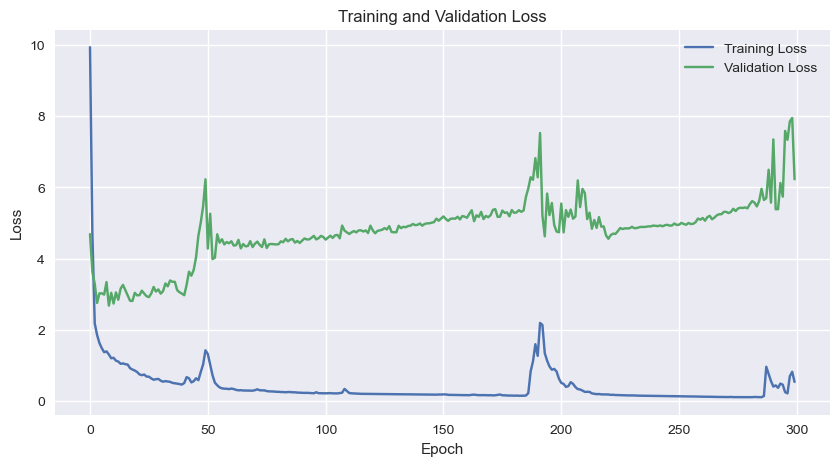

In [315]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

* REPEAT EXPERIMENTS USING THE AFOREMENTIONED TECHNIQUES TO PREVENT OVERFITTING

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 16)                442384    
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_41 (Dense)            (None, 16)                272       
                                                                 
 dropout_17 (Dropout)        (None, 16)                0         
                                                                 
 dense_42 (Dense)            (None, 10)                170       
                                                                 
Total params: 442,826
Trainable params: 442,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
10/10 [============================

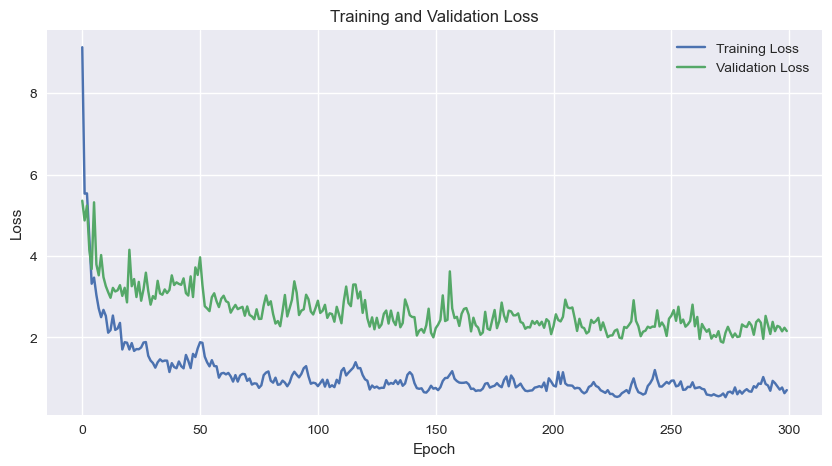

In [316]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

# ========== MODEL DEFINITION ==========
SEED = 1234 
dropout_rate = 0.1
l2_lambda = 0.01
units = 16
epochs = 300
batch_size = 32

model = tf.keras.models.Sequential()

# Input layer + 1st hidden layer
model.add(tf.keras.Input(shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(units,
                                activation='relu',
                                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=SEED),
                                kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)))
model.add(tf.keras.layers.Dropout(dropout_rate))

# 2nd hidden layer
model.add(tf.keras.layers.Dense(units,
                                activation='relu',
                                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=SEED),
                                kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)))
model.add(tf.keras.layers.Dropout(dropout_rate))

# Output layer
model.add(tf.keras.layers.Dense(10,
                                activation='softmax',
                                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=SEED)))
model.summary()

# ========== COMPILE ==========
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# ========== TRAIN ==========
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1)

# ========== EVALUATION 
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

min_val_loss = np.min(val_loss_history)
min_val_loss_epoch = np.argmin(val_loss_history)
accuracy_at_min_loss = val_accuracy_history[min_val_loss_epoch]

print(f"Minimum validation loss: {min_val_loss:.4f} at epoch {min_val_loss_epoch +1}")
print(f"Validation accuracy at that epoch: {accuracy_at_min_loss:.4f}")

best_val_accuracy = np.max(val_accuracy_history)
best_val_accuracy_epoch = np.argmax(val_accuracy_history)

print(f"Best validation accuracy: {best_val_accuracy:.4f} at epoch {best_val_accuracy_epoch+1}")


# ========== PLOT ==========
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


The model with dropout and L2 regularization performs better than the basic model.  
It shows improved generalization capabilities, with higher validation accuracy and lower validation loss.  
The regularization techniques help to reduce overfitting by preventing the model from memorizing the training data, leading to more reliable performance on unseen data.


### **Exercise 6**: CNN

Create training and validation partitions from Xdata. Remember that Xdata stores has size (400, 128, 216), storing 400 Mel spectrograms of sie (128,216). Name the partitions X_train, X_test, y_train and y_test.

In [317]:
# X_train, X_test, y_train, y_test = train_test_split(..., test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(Xdata, labels, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(320, 128, 216) (80, 128, 216) (320,) (80,)


Scale each spectrogram by substracting its mean and dividing by its standard deviation.

In [318]:
# Initialize the scaler
scaler = sklearn.preprocessing.StandardScaler()

# Lists to store the scaled spectrograms
X_train_s = []
X_test_s = []

# Apply standard scaling to each spectrogram in the training set
for x in X_train:
    x_scaled = scaler.fit_transform(x)  # shape (128, 216)
    X_train_s.append(x_scaled)

# Apply standard scaling to each spectrogram in the test set
for x in X_test:
    x_scaled = scaler.fit_transform(x)
    X_test_s.append(x_scaled)

# Convert the lists into numpy arrays
X_train_s = np.asarray(X_train_s)
X_test_s = np.asarray(X_test_s)

# Print the shape 
print(X_train_s.shape, X_test_s.shape)

(320, 128, 216) (80, 128, 216)


Create a convolutional neural network model. Remember to adapt the input shape of the first layer to the new input. 

You can start with a model like the next one. Remember to include regularization strategies like dropout layers.

| Layer | Type        | Filters/Units | Kernel/Pool Size | Activation | Output Shape        | Description                                  |
|-------|-------------|----------------|------------------|------------|---------------------|----------------------------------------------|
| Input | Input        | -              | -                | -          | (None, H, W, C)      | Input shape from `X_train_sx.shape[1:]`      |
| 1     | Conv2D       | 16             | (3, 3)           | ReLU       | (None, H-2, W-2, 16) | First convolutional layer                    |
| 2     | MaxPooling2D | -              | (3, 3), stride 3 | -          | (None, H//3, W//3, 16) | Downsamples feature maps                     |
| 3     | Conv2D       | 16             | (3, 3)           | ReLU       | (None, ..., ..., 16) | Second convolutional layer                   |
| 4     | MaxPooling2D | -              | (2, 2), stride 2 | -          | (None, ..., ..., 16) | Second pooling layer                         |
| 5     | Conv2D       | 32             | (2, 2)           | ReLU       | (None, ..., ..., 32) | Third convolutional layer                    |
| 6     | Flatten      | -              | -                | -          | (None, N)            | Flattens 2D features to 1D vector            |
| 7     | Dense        | 32             | -                | ReLU       | (None, 32)           | Fully connected hidden layer                 |
| 8     | Dropout      | -              | -                | -          | (None, 32)           | Dropout for regularization (rate=0.1)        |
| 9     | Dense        | 10             | -                | Softmax    | (None, 10)           | Output layer for 10-class classification     |

In [319]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Expand dimensions to add the channel dimension (required by Conv2D)
X_train_sx = np.expand_dims(X_train_s, axis=-1)
X_test_sx = np.expand_dims(X_test_s, axis=-1)

# Define the input shape
input_shape = (X_train_sx.shape[1], X_train_sx.shape[2], X_train_sx.shape[3])

# Create the CNN model
cnn_model = Sequential()

# 1st Conv layer + MaxPooling
cnn_model.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling2D(pool_size=(3, 3), strides=3))

# 2nd Conv layer + MaxPooling
cnn_model.add(Conv2D(16, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides= 2))

# 3rd Conv layer
cnn_model.add(Conv2D(32, (2, 2), activation='relu'))

# Flatten the feature maps
cnn_model.add(Flatten())

# Dense layer + Dropout
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dropout(0.1))

# Output layer (10 classes)
cnn_model.add(Dense(10, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Print model summary
cnn_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 214, 16)      160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 42, 71, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 40, 69, 16)        2320      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 20, 34, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 19, 33, 32)        2080      
                                                                 
 flatten_5 (Flatten)         (None, 20064)           

Fit the model and try to improve the results obtained with the MLP model.

In [320]:
# Fit the model
history = cnn_model.fit(X_train_sx, y_train,
                        validation_data=(X_test_sx, y_test),
                        batch_size=32,
                        epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 82ms/step - loss: 2.3560 - accuracy: 0.1406 - val_loss: 2.1444 - val_accuracy: 0.2875
Epoch 2/100
10/10 [==============================] - 1s 74ms/step - loss: 2.0742 - accuracy: 0.2906 - val_loss: 1.8849 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 1s 79ms/step - loss: 1.7971 - accuracy: 0.4062 - val_loss: 1.6866 - val_accuracy: 0.4250
Epoch 4/100
10/10 [==============================] - 1s 92ms/step - loss: 1.5795 - accuracy: 0.4812 - val_loss: 1.5115 - val_accuracy: 0.5000
Epoch 5/100
10/10 [==============================] - 1s 103ms/step - loss: 1.2742 - accuracy: 0.5813 - val_loss: 1.4173 - val_accuracy: 0.5875
Epoch 6/100
10/10 [==============================] - 1s 95ms/step - loss: 1.0234 - accuracy: 0.6531 - val_loss: 1.2175 - val_accuracy: 0.5875
Epoch 7/100
10/10 [==============================] - 1s 99ms/step - loss: 0.8804 - accuracy: 0.7125 - val_loss: 1.2920 - val_accuracy: 0.5625
Epoch

Plot the training history (train/val loss/accuracy)

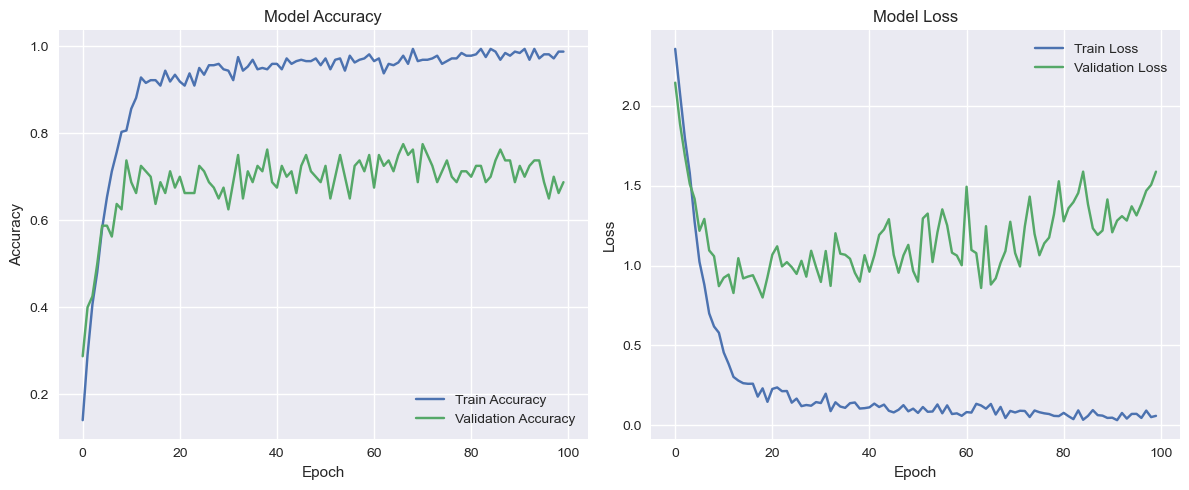

In [321]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Which is the minimum loss achieved by the model? At which epoch achieved that loss value?

In [322]:
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

min_val_loss = np.min(val_loss_history)
max_val_accuracy = np.max(val_accuracy_history)

min_val_loss_index = np.where(val_loss_history == min_val_loss)
max_val_accuracy_index = np.where(val_accuracy_history == max_val_accuracy)

print('Minimum Loss on the Validation Set: ', min_val_loss ,' obtained at epoch: ' , ''.join(map(str, min_val_loss_index[0])), '  with an Accuracy of: ', val_accuracy_history[int(min_val_loss_index[0])] )

Minimum Loss on the Validation Set:  0.8000537157058716  obtained at epoch:  18   with an Accuracy of:  0.7124999761581421


Tune your model and try to achieve an accuracy above 60%.

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 126, 214, 16)      160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 42, 72, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Batc  (None, 42, 72, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout_19 (Dropout)        (None, 42, 72, 16)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 40, 70, 16)        2320      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 20, 35, 16)     

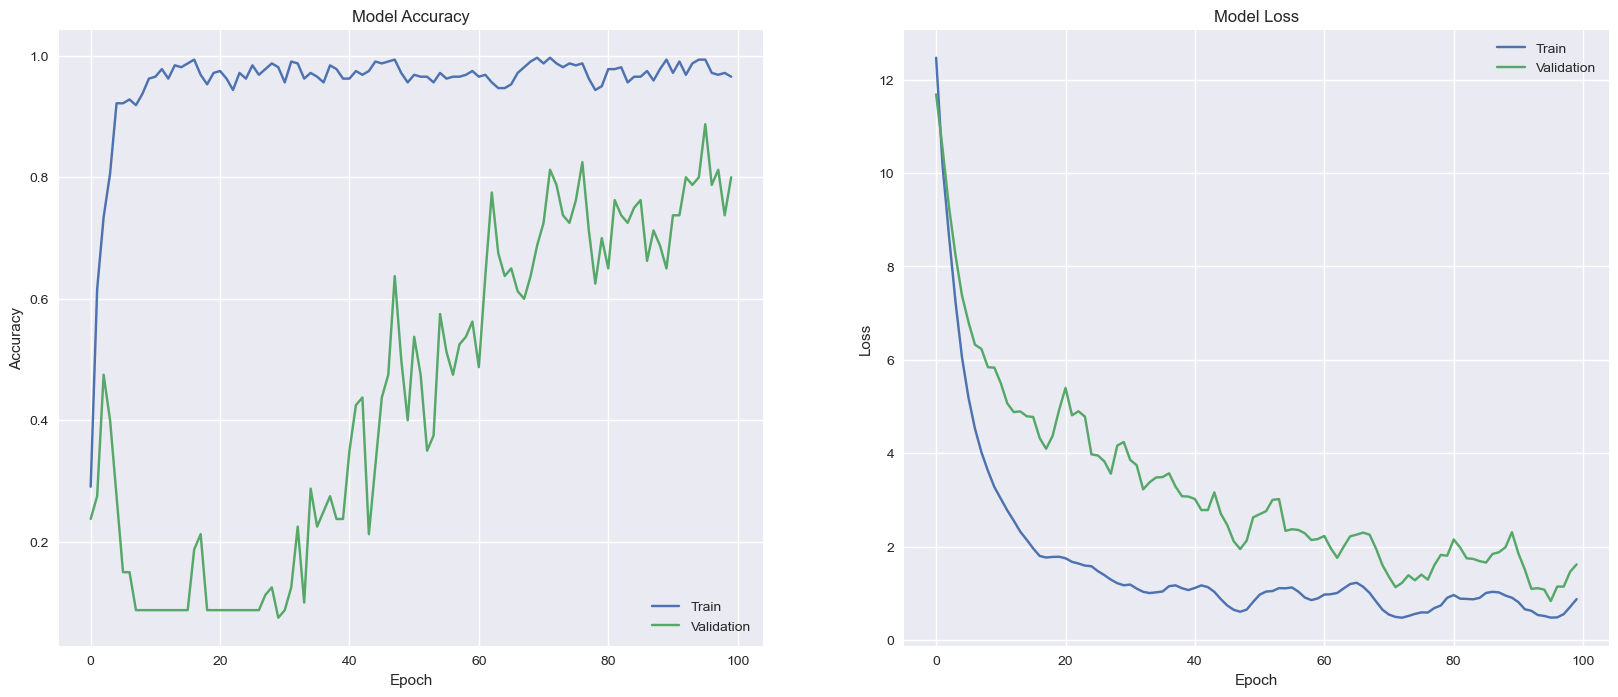

In [323]:
# Tuning parameters
dropout = 0.1
regularization = 0.1

# Recreate the CNN model with tuning
cnn_model = tf.keras.models.Sequential()

# 1st Conv layer + MaxPooling + BN + Dropout
cnn_model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(X_train_sx.shape[1], X_train_sx.shape[2], X_train_sx.shape[3]),
                                     kernel_regularizer=tf.keras.regularizers.l2(regularization)))
cnn_model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(3, 3), padding='same'))
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.Dropout(dropout))

# 2nd Conv layer + MaxPooling + Dropout
cnn_model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(regularization)))
cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
cnn_model.add(tf.keras.layers.Dropout(dropout))

# 3rd Conv layer + BN + Dropout
cnn_model.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(regularization)))
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.Dropout(dropout))

# Flatten and Dense layers
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(32, activation='relu',
                                    kernel_regularizer=tf.keras.regularizers.l2(regularization)))
cnn_model.add(tf.keras.layers.Dropout(dropout))

# Output layer
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
cnn_model.summary()

# Fit the model
history_regularized = cnn_model.fit(X_train_sx, y_train,
                                    validation_data=(X_test_sx, y_test),
                                    batch_size=32, epochs=100)


# evaluate the model
val_loss_history = history_regularized.history['val_loss']
val_accuracy_history = history_regularized.history['val_accuracy']

min_val_loss = np.min(val_loss_history)
max_val_accuracy = np.max(val_accuracy_history)

min_val_loss_index = np.where(val_loss_history == min_val_loss)
max_val_accuracy_index = np.where(val_accuracy_history == max_val_accuracy)

print('Minimum Loss on the Validation Set: ', min_val_loss,
      ' obtained at epoch: ', ''.join(map(str, min_val_loss_index[0])),
      ' with an Accuracy of: ', val_accuracy_history[int(min_val_loss_index[0])])


# Plot training & validation accuracy values
plt.figure(figsize=(20, 8))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_regularized.history['accuracy'])
plt.plot(history_regularized.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_regularized.history['loss'])
plt.plot(history_regularized.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

### Model Tuning Explanation

To improve the performance of the convolutional neural network introduced in Exercise 6, several regularization techniques and architectural enhancements were applied:

- **Dropout layers** were added after each major block (convolutional and dense) to reduce the risk of overfitting by randomly disabling a fraction of neurons during training. This encourages the network to develop redundant representations and improves generalization.

- **L2 regularization** (`kernel_regularizer`) was applied to both convolutional and dense layers. This penalizes large weight values, encouraging the network to find simpler and more robust solutions. In this case, increasing the regularization factor to `0.1` — higher than the typical `0.01` — helped reduce overfitting more effectively, leading to improved training performance and model robustness.

- **Batch normalization** layers were inserted after some convolutional layers to stabilize and accelerate training. By normalizing activations within each batch, it mitigates internal covariate shift and enables the use of higher learning rates.

---

Compared to the initial CNN model defined earlier in Exercise 6 (which lacked dropout, regularization, and normalization), this tuned version achieves improved performance by controlling overfitting and enhancing training dynamics. 
While the **validation loss increased slightly**, the **validation accuracy improved**, suggesting that the model's predictions became more consistent and correct overall, even if slightly less "confident". This trade-off often occurs when stronger regularization is applied and can indicate **better generalization** despite a less sharp loss minimum.


